#Prediction Tendency Task

I based my code on this preprint by Juliane Schubert et al. (2022):
https://www.biorxiv.org/content/10.1101/2022.04.22.489224v1.full.pdf

Additionally, Juliane was so kind as to give me access to a repo containing a lot scripts for the implementation of the paradigm in MATLAB.

In [10]:
""" SETTINGS """

# import modules
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt # for testing

# for hidden markov models:
!pip install hmmlearn
from hmmlearn import hmm

# ------------------------------------

# Settings for the prediction tendency task:

# for the sounds:
tones = [440, 587, 782, 1043]  # Pure tone frequencies in Hz
tone_duration = 0.1  # Duration of each pure tone in seconds (each lasted 100 ms)
tone_rate = 3  # Rate of pure tone presentation in Hz
tone_volume = 1 # use full volume, but you can adjust this later if you determined a hearing threshold
audio_sample_freq = 44100 # 44100 Hz --> audio sampling rate at the lab (according to Frauke)
tones_iti = 1/3
tone_fade = 5e-3

# for the paradigm:
block_trials = 1500  # Number of trials per entropy condition
trigger_ordered = 1
trigger_random = 2

# what is all of this for?
#sound_db = 40
#cfg['triggers']['stims'] = [16, 32, 64, 128]


In [11]:
def generate_trial_sequence(entropy_level):

    # check how many tones we have - this determines
    # how big our matrices with the transition probabilities
    # need to be:
    n_features = len(tones)

    # create emission matrix: We want to emit
    # the given state with 100% probability
    # (feels a bit odd to explicitly specify that,
    # but we need it for the HMM function later)
    emission_matrix = np.eye(n_features)
    #print(emission_matrix)


    if entropy_level == "ordered":
        # create a matrix with transition probabilities
        # for the ordered condition:
        transition_matrix = [[0.25, 0.75, 0., 0.],
                             [0., 0.25, 0.75, 0.],
                             [0., 0., 0.25, 0.75],
                             [0.75, 0., 0., 0.25]]
        #print("ordered transition probabilities matrix:", transition_matrix)

    elif entropy_level == "random":
        # create a matrix with transition probabilities
        # for the random condition:
        transition_matrix = [[0.25, 0.25, 0.25, 0.25],
                             [0.25, 0.25, 0.25, 0.25],
                             [0.25, 0.25, 0.25, 0.25],
                             [0.25, 0.25, 0.25, 0.25]]
        #print("random transition probabilities matrix:", transition_matrix)




    # Create an HMM model
    model = hmm.MultinomialHMM(n_components = n_features,
                               n_trials = 1,
                               verbose = False)

    model.startprob_ = np.ones(n_features) / n_features  # Set equal initial probabilities
    model.transmat_ = transition_matrix
    model.emissionprob_ = emission_matrix

    # Generate a sequence of pure tones
    sequence, _ = model.sample(n_samples = 1500, random_state = None)

    pure_tones_sequence = []

    for sublist in sequence:
      #print(sublist)
      index = np.where(sublist != 0)[0][0]  # Get the index of the non-zero element
      #print(index)
      pure_tone = tones[index]  # Retrieve the corresponding pure tone
      pure_tones_sequence.append(pure_tone)

    #print(sequence)

    # TO DO:
    # The transition probabilities don't match exactly the probabilities I specified in my transition matrix.
    # Idea: Polish it a bit manually, so I get exactly 0%, 25% and 75% transition probabilities in the
    # output? Or is this not a problem?

    return(pure_tones_sequence)

# Generate the trial sequences for both entropy conditions
ordered_sequence = generate_trial_sequence("ordered")
random_sequence = generate_trial_sequence("random")
print(ordered_sequence)

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


[1043, 440, 440, 587, 782, 1043, 440, 587, 782, 1043, 440, 440, 587, 782, 782, 1043, 1043, 440, 587, 782, 1043, 1043, 440, 440, 587, 782, 1043, 1043, 440, 440, 587, 782, 782, 1043, 440, 587, 782, 1043, 440, 587, 782, 1043, 440, 440, 587, 782, 1043, 440, 587, 782, 1043, 440, 587, 587, 782, 1043, 440, 440, 587, 782, 1043, 440, 587, 782, 1043, 440, 587, 587, 782, 1043, 440, 587, 782, 1043, 1043, 1043, 1043, 440, 440, 587, 587, 782, 1043, 440, 587, 782, 1043, 440, 587, 782, 1043, 440, 587, 587, 782, 1043, 440, 587, 782, 1043, 1043, 440, 587, 782, 782, 1043, 440, 587, 782, 1043, 440, 587, 782, 1043, 1043, 440, 587, 587, 782, 1043, 440, 587, 782, 782, 1043, 440, 587, 587, 587, 782, 1043, 440, 587, 587, 782, 782, 1043, 1043, 440, 440, 440, 587, 782, 1043, 1043, 440, 587, 782, 782, 1043, 440, 440, 587, 782, 782, 782, 1043, 440, 440, 440, 587, 587, 782, 1043, 440, 587, 782, 782, 782, 1043, 1043, 440, 587, 782, 1043, 1043, 1043, 1043, 440, 440, 440, 440, 440, 587, 782, 1043, 1043, 440, 587, 782,

In [ ]:
# prepare 1000 sound sequences for both conditions
 # (so that basically I could run this study until I'm 80
 # and won't run out of sequences)

# Create empty data frames for both conditions:
df_ordered_seqs = pd.DataFrame()
df_random_seqs = pd.DataFrame()

# do this 1000x
for i in range(1000):
  print(i)
  # Generate the trial sequences for both entropy conditions
  ordered_sequence = generate_trial_sequence("ordered")
  random_sequence = generate_trial_sequence("random")

  # append current arrays as new rows to the 2 data frames
  df_ordered_seqs = df_ordered_seqs.append(pd.Series(ordered_sequence), ignore_index = True)
  df_random_seqs = df_random_seqs.append(pd.Series(random_sequence), ignore_index = True)



In [ ]:
# download dataframes
from google.colab import files

df_ordered_seqs.to_csv('df_ordered_seqs.csv', encoding = "utf-8-sig")
df_random_seqs.to_csv('df_random_seqs.csv', encoding = "utf-8-sig")
files.download('df_ordered_seqs.csv')
files.download('df_random_seqs.csv')

In [ ]:
# Test if the function actually works as intended and produces on average the correct matrices:

''' Function for calculating transition probabilities of 1 sequence'''
def calculate_transition_probabilities(sequence):
    transition_counts = np.zeros((len(tones), len(tones)))

    for i in range(1, len(sequence)):
        prev_tone = sequence[i-1]
        current_tone = sequence[i]
        prev_tone_index = tones.index(prev_tone)
        current_tone_index = tones.index(current_tone)

        transition_counts[prev_tone_index][current_tone_index] += 1

    # Replace zero counts with a small value
    transition_counts[transition_counts == 0] = 1e-6

    transition_probs = transition_counts / np.sum(transition_counts, axis=1, keepdims=True)

    return transition_probs



'''
Generate 10,000 sequences for each condition and
test their transition probabilities
'''
# Create empty data frames for both conditions:
df_ordered_test = pd.DataFrame()
df_random_test = pd.DataFrame()

# do this 10,000x
for i in range(10000):
  print(i)
  # Generate the trial sequences for both entropy conditions
  ordered_sequence = generate_trial_sequence("ordered")
  random_sequence = generate_trial_sequence("random")

  # append current arrays as new rows to the 2 data frames
  df_ordered_test = df_ordered_test.append(pd.Series(ordered_sequence), ignore_index = True)
  df_random_test = df_random_test.append(pd.Series(random_sequence), ignore_index = True)


# tones was defined above like this:
#tones = [440, 587, 782, 1043]

# create 2 empty average transition probability
# matrices for our 2 conditions:
avg_transition_probs_ordered = np.zeros((len(tones), len(tones)))
avg_transition_probs_random = np.zeros((len(tones), len(tones)))

# loop rows in df_ordered_test:
for _, row in df_ordered_test.iterrows():
    # get current row
    sequence = row.values
    # calculate transition probabilities
    transition_probs = calculate_transition_probabilities(sequence)
    # add matrix values to our matrix with the average values
    avg_transition_probs_ordered += transition_probs

# do the same for the dataframe df_random_test:
for _, row in df_random_test.iterrows():
    sequence = row.values
    transition_probs = calculate_transition_probabilities(sequence)
    avg_transition_probs_random += transition_probs

# Divide values in the matrices by the total number of rows in
# each dataframe to get average transition probabilities
avg_transition_probs_ordered /= len(df_ordered_test)
avg_transition_probs_random /= len(df_random_test)



# Set numpy print options
np.set_printoptions(precision = 3, suppress = True)

# Display the transition probability matrices
print("Average Ordered Transition Probabilities Matrix:")
print(avg_transition_probs_ordered)
print()

# Display the transition probability matrices
print("Average Ordered Transition Probabilities Matrix:")
print(avg_transition_probs_random)
print()

# Running this takes about 2 hours, but the output looks roughly like this:

#Average Ordered Transition Probabilities Matrix:
#[[0.25  0.75  0.    0.   ]
# [0.    0.25  0.75  0.   ]
# [0.    0.    0.25  0.75 ]
# [0.751 0.    0.    0.249]]

#Average Ordered Transition Probabilities Matrix:
#[[0.249 0.25  0.25  0.25 ]
# [0.25  0.25  0.25  0.25 ]
# [0.25  0.25  0.249 0.25 ]
# [0.25  0.251 0.25  0.249]]

# So as you can see, on average we get
# the matrices Juliane describes in her paper.

------------------------------------------------

OLD SNIPPETS:


curent frequency: 440


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


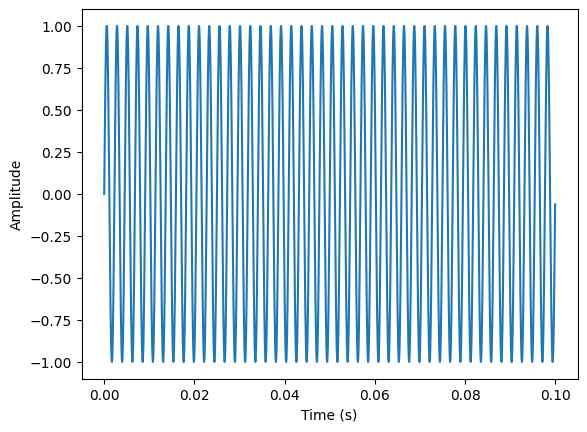

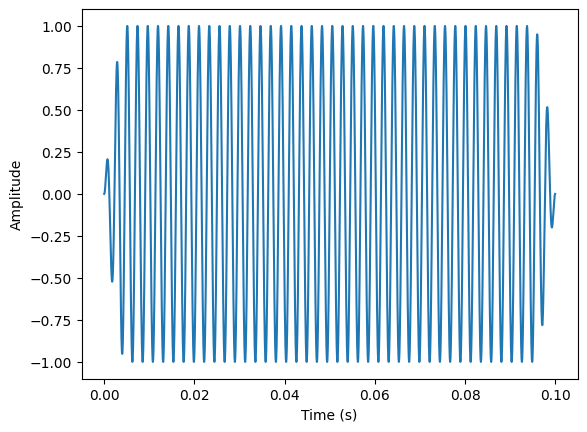

----------------------


NameError: ignored

In [19]:
# this doesn't work without PsychoPy's sound module

''' PREP SOUNDS FOR RANDOM SEQUENCE: '''

# create an empty dict to store the prepared sounds
tones_random = {}

# loop over list random_sequence with all frequencies
for tone_idx, curr_freq in enumerate(random_sequence):

    print("curent frequency:", curr_freq)

    # build a time array: you need the sound duration and the right sampling frequency for your device
    # 1 divided by the sampling rate = duration of a single sample in sec
    tone_sample_len = 1/audio_sample_freq
    t = np.arange(0, tone_duration, tone_sample_len)

    # generate sine wave:
    sine_wave = np.sin(2*np.pi*curr_freq*t)

    # plot the sine wave
    plt.plot(t, sine_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Apply cosine ramp to "smoothen" the edges of the sound a bit (I'm not an audio expert as you can tell)
    # We basically gradually turn up the sound, play it for a while,
    # and then decrease the volume again so it doesn't make annoying clicky noises when it's played.

    # apply cosine ramp:
    # check how many samples we have to use for the fade in/out:
    fade_samples = int(tone_fade * audio_sample_freq)

    # if there are enough, but not too many fade samples,
    # apply cosine ramp to signal
    if fade_samples > 0 and fade_samples < len(sine_wave):
      ramp = np.cos(np.linspace(0, np.pi / 2, fade_samples))
      sine_wave[:fade_samples] *= ramp[::-1]
      sine_wave[-fade_samples:] *= ramp

    # plot the modified sine wave again
    plt.plot(t, sine_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    print("----------------------")


    # generate sound object for the sound file we built
    sound = Sound(value = sine_wave,
                  secs = tone_duration, # duration of sound in seconds
                  sampleRate = sRate,
                  name = f"tone{tone_idx + 1}", # create a name for the sound for logging
                  hamming = False, # don't apply filter, we did this before
                  volume = tone_volume,
                  loops = 0) # don't repeat sound, play only once

    # add the sound to the dict
    tones_random[f"tone{tone_idx + 1}_random"] = sound





''' PREP SOUNDS FOR ORDERED SEQUENCE: '''

# create an empty dict to store the prepared sounds
tones_ordered = {}

# loop over list ordered_sequence with all frequencies
for tone_idx, curr_freq in enumerate(ordered_sequence):

    print("curent frequency:", curr_freq)

    # build a time array: you need the sound duration and the right sampling frequency for your device
    # 1 divided by the sampling rate = duration of a single sample in sec
    tone_sample_len = 1/audio_sample_freq
    t = np.arange(0, tone_duration, tone_sample_len)

    # generate sine wave:
    sine_wave = np.sin(2*np.pi*curr_freq*t)

    # plot the sine wave
    plt.plot(t, sine_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Apply cosine ramp to "smoothen" the edges of the sound a bit (I'm not an audio expert as you can tell)
    # We basically gradually turn up the sound, play it for a while,
    # and then decrease the volume again so it doesn't make annoying clicky noises when it's played.

    # apply cosine ramp:
    # check how many samples we have to use for the fade in/out:
    fade_samples = int(tone_fade * audio_sample_freq)

    # if there are enough, but not too many fade samples,
    # apply cosine ramp to signal
    if fade_samples > 0 and fade_samples < len(sine_wave):
      ramp = np.cos(np.linspace(0, np.pi / 2, fade_samples))
      sine_wave[:fade_samples] *= ramp[::-1]
      sine_wave[-fade_samples:] *= ramp

    # plot the modified sine wave again
    plt.plot(t, sine_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    print("----------------------")


    # generate sound object for the sound file we built
    sound = Sound(value = sine_wave,
                  secs = tone_duration, # duration of sound in seconds
                  sampleRate = sRate,
                  name = f"tone{tone_idx + 1}", # create a name for the sound for logging
                  hamming = False, # don't apply filter, we did this before
                  volume = tone_volume,
                  loops = 0) # don't repeat sound, play only once

    # add the sound to the dict
    tones_ordered[f"tone{tone_idx + 1}_ordered"] = sound

# now you can access & play each sound by its name, like this:
#now = ptb.GetSecs()
#tones_ordered["tone1_ordered"].play(when = now)  # Play the first sound immediately
#core.wait(1.5) # wait until sound is finished